In [966]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [967]:
"""A cloth manufacturing company is interested to know about the segment or attributes causes high sale."""
"""Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis"""

'Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis'

In [968]:
# Load the dataset using pandas
data = pd.read_csv("E:\\Decision Trees\\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [969]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [970]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [971]:
# as the data contains many categorical variables we have to convert them into int64 datatypes using the labelencoder
encoder = LabelEncoder()

In [972]:
# label encoding the object data types
df['ShelveLoc']=encoder.fit_transform(df['ShelveLoc'])
df['Urban']=encoder.fit_transform(df['Urban'])
df['US']=encoder.fit_transform(df['US'])

In [973]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [974]:
# inserting a new columns for seeing the impact of categories on sales
df.insert(11,'sale_categories','')

In [975]:
for i in range(0,len(df['Sales']),1):
    if df['Sales'][i]>=11.0:
        df['sale_categories'][i]='high'
    else:
        df['sale_categories'][i]='low'

In [976]:
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_categories
0,9.50,138,73,11,276,120,0,42,17,1,1,low
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,low
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
5,10.81,124,113,13,501,72,0,78,16,0,1,low
6,6.63,115,105,0,45,108,2,71,15,1,0,low
7,11.85,136,81,15,425,120,1,67,10,1,1,high
8,6.54,132,110,0,108,124,2,76,10,0,0,low
9,4.69,132,113,0,131,124,2,76,17,0,1,low


In [977]:
df['sale_categories']=encoder.fit_transform(df['sale_categories'])

In [978]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_categories
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [979]:
x = df.iloc[:,1:11]
y = df['sale_categories']

In [980]:
# partiotioning the data into independant and dependant variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2)

In [981]:
print(x_train.head()) , print(y_train.head())

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
323        107     105           18         428    103          2   34   
34         115      54            0         406    128          2   42   
281        122      69            7         303    105          1   45   
44          85      79            6         325     95          2   69   
248        111      52            0          12    101          2   61   

     Education  Urban  US  
323         12      1   1  
34          17      1   1  
281         16      0   1  
44          13      1   1  
248         11      1   1  
323    1
34     1
281    0
44     1
248    1
Name: sale_categories, dtype: int32


(None, None)

In [982]:
# Decisiontree_classifier model
d_tree = DecisionTreeClassifier()

In [983]:
# Decisiontree_classifier model fitting
d_tree.fit(x_train,y_train)
y_pred = d_tree.predict(x_test)

In [984]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [985]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.91      0.94      0.93        67

    accuracy                           0.88        80
   macro avg       0.77      0.74      0.75        80
weighted avg       0.87      0.88      0.87        80



In [986]:
print(accuracy_score(y_test,y_pred)),
print(confusion_matrix(y_test,y_pred))

0.875
[[ 7  6]
 [ 4 63]]


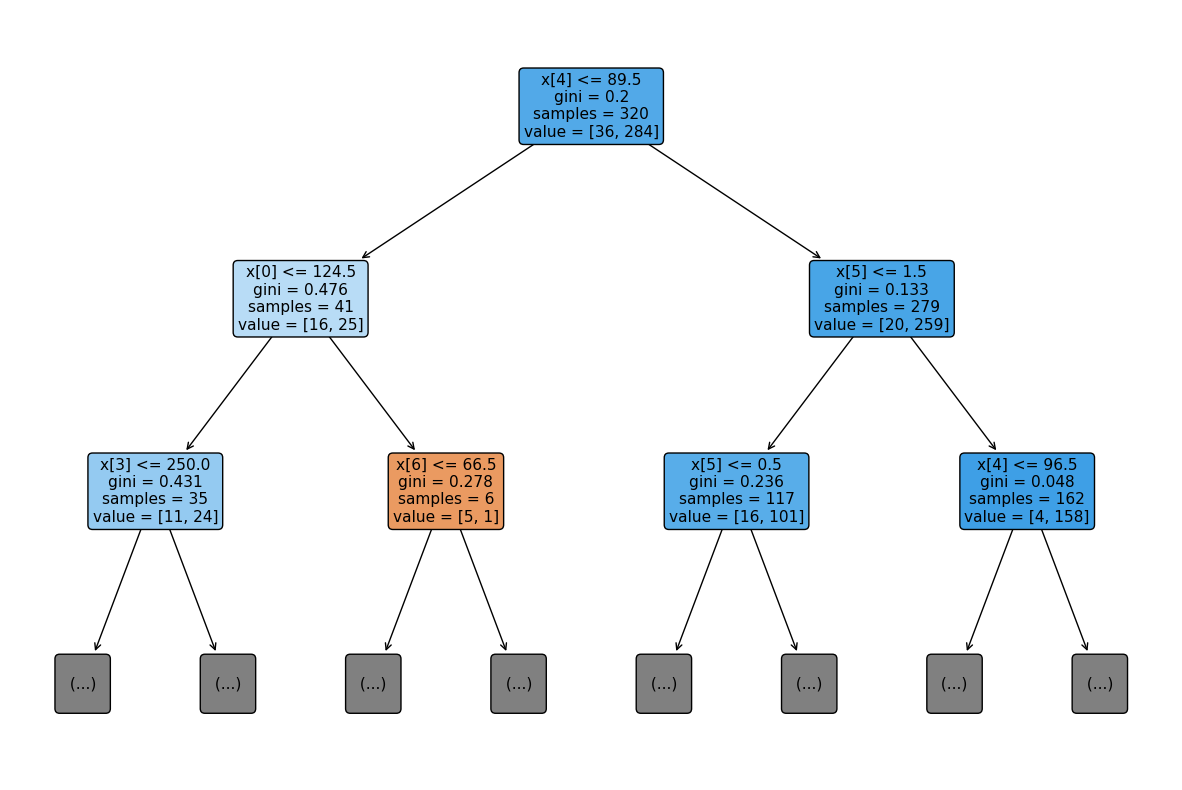

In [987]:
# plotting the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(d_tree,rounded=True,filled=True,max_depth=2)
plt.show()

In [988]:
# search using gridsearch from decisiontree
grid_search = GridSearchCV(estimator=d_tree,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]})

In [989]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.890625


In [990]:
model_entropy = DecisionTreeClassifier(criterion= 'entropy',max_depth=10, min_samples_leaf=1, min_samples_split= 2)
model_entropy.fit(x_train,y_train)
y_predn = model_entropy.predict(x_test)
gs_score=accuracy_score(y_test,y_predn)
gs_score

0.8875

In [991]:
category_dt = x_train.columns
len(category_dt)

10

In [992]:
imp_categories = d_tree.feature_importances_
len(imp_categories)

10

In [993]:
data_gs=pd.DataFrame({'category':category_dt,'imp_category':imp_categories})
data_gs=data_gs.sort_values('imp_category')

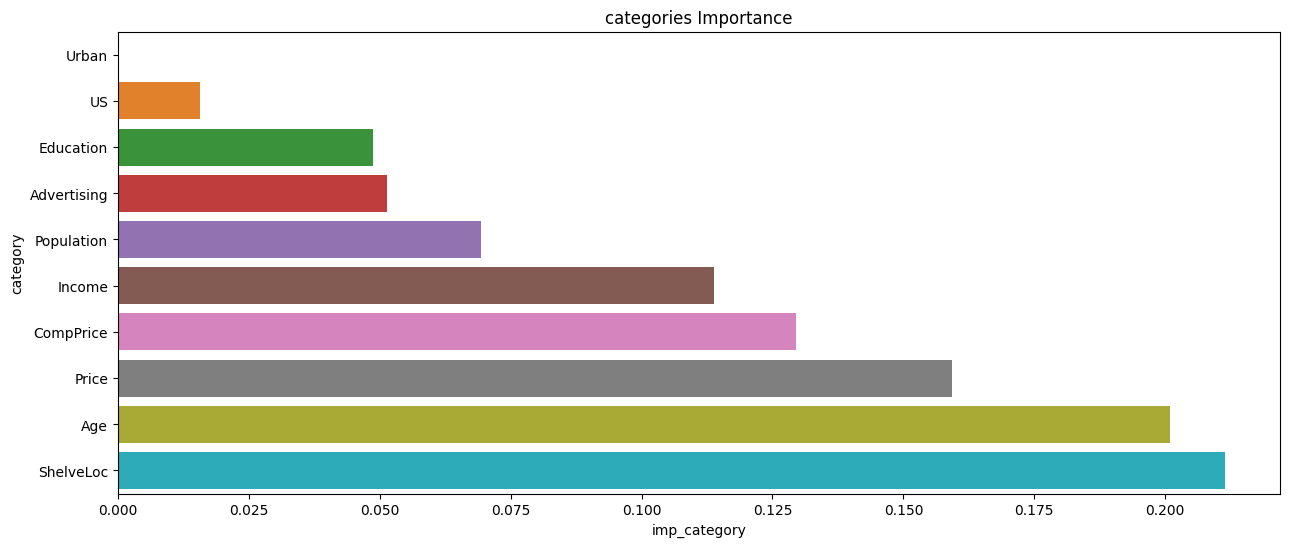

In [994]:
# plotting the important categories using barplot
plt.figure(figsize=(15,6))
plt.title('categories Importance')
sns.barplot(y='category', x='imp_category', data=data_gs)
plt.show()

In [995]:
selector=SelectFromModel(estimator=DecisionTreeClassifier())
selector.fit(x_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier())

In [996]:
selector.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [997]:
length=len(x_train.columns)
length

10

In [998]:
column = x_train.columns[selector.get_support()]

In [999]:
len(column)

5

In [1000]:
x_train_dt=selector.transform(x_train)
x_test_dt=selector.transform(x_test)

In [1001]:
model_dt=DecisionTreeClassifier().fit(x_train_dt,y_train)
y_pred_imp=model_dt.predict(x_test_dt)

In [1002]:
print(accuracy_score(y_test,y_pred_imp))
print(confusion_matrix(y_test,y_pred_imp))
DT_scores=accuracy_score(y_test,y_pred_imp)

0.8125
[[ 5  8]
 [ 7 60]]


In [1003]:
print(classification_report(y_test,y_pred_imp))

              precision    recall  f1-score   support

           0       0.42      0.38      0.40        13
           1       0.88      0.90      0.89        67

    accuracy                           0.81        80
   macro avg       0.65      0.64      0.64        80
weighted avg       0.81      0.81      0.81        80



In [1004]:
imp_category=model_dt.feature_importances_
imp_category

array([0.16103544, 0.07996125, 0.28296014, 0.22201902, 0.25402414])

In [1005]:
data_dt=pd.DataFrame({'category':column,'imp_category':imp_category})
data_dt=data_dt.sort_values('imp_category')

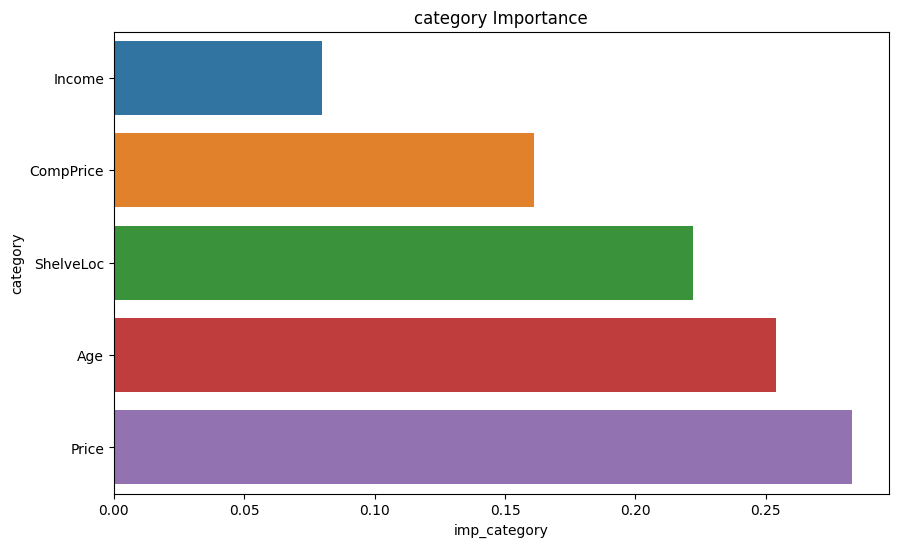

In [1006]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('category Importance')
sns.barplot(y='category', x='imp_category', data=data_dt)
plt.show()

In [1007]:
from sklearn.feature_selection import RFE
selector_rfe=RFE(DecisionTreeClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [1008]:
selector_rfe.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [1009]:
category_rfe=x_train.columns[selector_rfe.get_support()]
category_rfe

Index(['CompPrice', 'Income', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [1010]:
len(x_train.columns[selector_rfe.get_support()])

5

In [1011]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [1012]:
dt_model_rfe=DecisionTreeClassifier().fit(x_train_rfe,y_train)

In [1013]:
y_pred_rfe=dt_model_rfe.predict(x_test_rfe)

In [1014]:
print(accuracy_score(y_test,y_pred_rfe))
print(confusion_matrix(y_test,y_pred_rfe))
RFE_scores=accuracy_score(y_test,y_pred_rfe)

0.825
[[ 5  8]
 [ 6 61]]


In [1015]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.88      0.91      0.90        67

    accuracy                           0.82        80
   macro avg       0.67      0.65      0.66        80
weighted avg       0.81      0.82      0.82        80



In [1016]:
imp_category_rfe=dt_model_rfe.feature_importances_

In [1017]:
data_rfe=pd.DataFrame({'category':category_rfe,'imp_category':imp_category_rfe})
data_rfe=data_rfe.sort_values('imp_category')

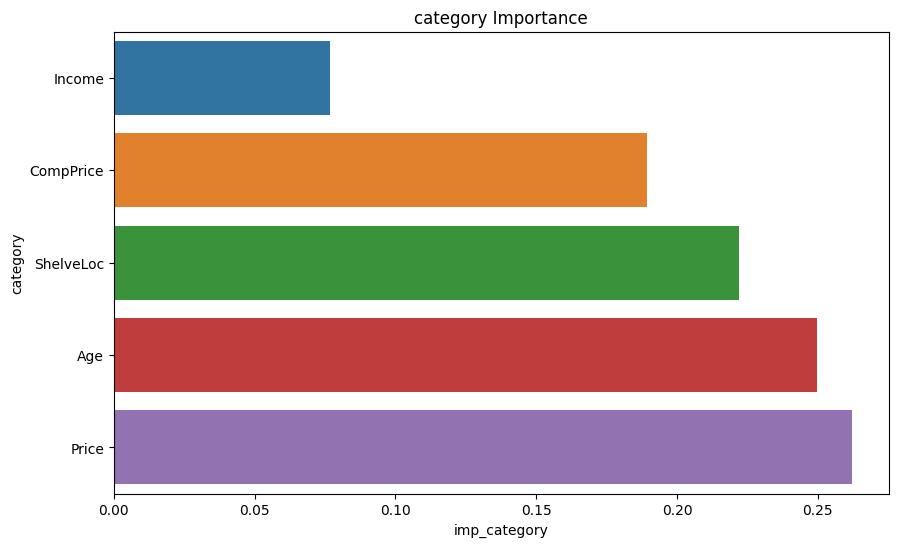

In [1018]:
plt.figure(figsize=(10,6))
plt.title('category Importance')
sns.barplot(y='category', x='imp_category', data=data_rfe)
plt.show()

In [1019]:
#make a table containing R^2-adj value for each prepared model.
scores={'DT_models':['Grid Search','Decision tree',"Recurive Feature Elimination"],'Accuracy_scores':[gs_score,DT_scores,RFE_scores]}
table=pd.DataFrame(scores)
table

# Using Grid search hyperparameter has the highest accuracy scores but it also has the lowest variables present in the data i.e 10 variables.
# from above graph we can see that these are the important categories that are having an impact on the sales.
# price<Age<ShelveLoc<comprice<income if sales_category variable is encoded in RFE.

,DT_models,Accuracy_scores
0,Grid Search,0.8875
1,Decision tree,0.8125
2,Recurive Feature Elimination,0.8250
